## Problem Set # 3
- **Daniel Leskiewicz**

#### Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from statistics import mean
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

## Problem 1)

In [4]:
d = pd.read_csv('peak_lfc.csv')

In [5]:
d[0:10]

,log_fold_change
0,4.28351
1,2.79465
2,1.51552
3,1.51892
4,2.05290
5,2.44644
6,2.41636
7,2.40385
8,1.64442
9,1.96694


### b) Plotting histogram

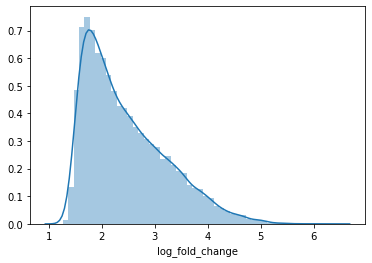

In [6]:
#histogram plot 
sns.distplot(d['log_fold_change'])

### c) Centering and Plottin the data

In [7]:
original_data = d['log_fold_change']
mean_data = np.mean(d['log_fold_change'])
result_mean = original_data - mean_data

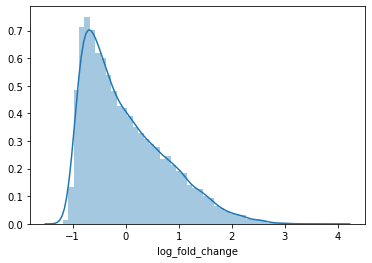

In [8]:
sns.distplot(result_mean)

### d) Scale and Plot Data

In [9]:
std_data = np.std(d['log_fold_change'])
result_std = original_data / std_data

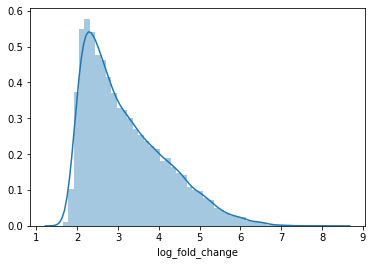

In [10]:
sns.distplot(result_std)

#### e) Both center and scale the data. Plotting the histogram

#### Whats the difference?

In [11]:
result_both = result_mean / result_std

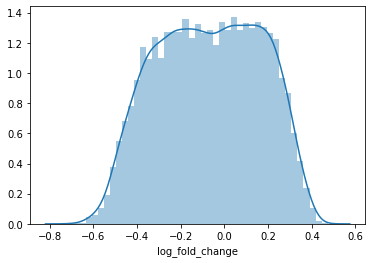

In [12]:
sns.distplot(result_both)

### Problem 2

In [13]:
data = np.loadtxt("IRIS.csv", delimiter=',', skiprows=1, usecols=(0,1))

In [14]:
sample = np.linspace(4,8,10)
response = 0.75 * sample - 0.9

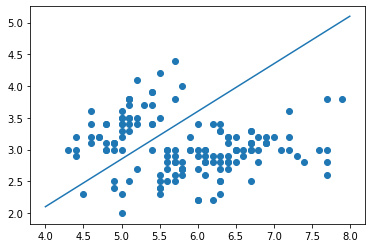

In [15]:
plt.scatter(data[:,0], data[:,1])
plt.plot(sample, response)
fig = plt.gcf()
#fig.set_size_inches(4.5, 10.5)

In [16]:
original_matrix = np.array([[3/4,-1],[-4/3,-1]])

In [17]:
def getting_xy_(x,y):
    b = y+(x*4/3)
    ma = np.array([[.9], [-b]])
    calc = np.dot(np.linalg.inv(original_matrix), ma)
    return calc
def get_distance_norm(x,y):
    d = np.array(getting_xy_(x,y).reshape(1,2))
    xy = np.array([x,y])
    norm_distance = np.linalg.norm(d-xy)
    return norm_distance

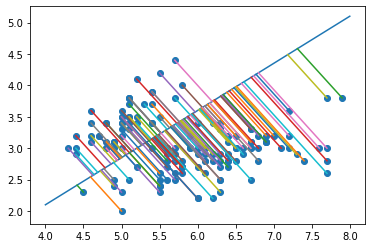

In [18]:
plt.plot(sample,response)
plt.scatter(data[:,0], data[:,1])
for x,y in data:
    z,a = getting_xy_(x,y)
    plt.plot((x,z), (y,a))

In [24]:
distance = np.array([])
for g,h in data:
    distance = np.append(distance, get_distance_norm(g,h))
#distances 
distance[:10]

array([0.46, 0.18, 0.46, 0.44, 0.6 , 0.6 , 0.68, 0.44, 0.4 , 0.26])

## Problem 4

### 1- How do you expect the complexity of a KNN classifier will change if K increase? In other words, as we increase k, will the decision boundary become simpler and smoother or will it have more angles and curves? 

#### 2)

In [18]:
features = np.loadtxt("diabetes.csv", delimiter=',',skiprows=1, usecols=(0,1,2,3,4,5,6,7))
label = np.loadtxt("diabetes.csv", delimiter=',', skiprows=1, usecols=(8))

#### 3)


In [19]:
train_x, test_x, train_y, test_y = train_test_split(features, label, stratify=label)
model = KNeighborsClassifier()
model.fit(train_x,train_y)
predicted_labels = model.predict(test_x)

#### 4)

In [20]:
score = cross_validate(model, features, label, return_train_score=True)
trains_score_average = mean(score['train_score'])
test_score_average = mean(score['test_score'])
print("Train score average: ", trains_score_average)
print("Test score average: ", test_score_average)

Train score average:  0.810566723422426
Test score average:  0.7148357827242441


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


#### 5)

In [21]:
k_value = [1,5,15,25,35,45,50]
accuracy_average = []
testing_accuracy = []
training_accuracy = []

In [22]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_x, train_y)
predicted_labels = model.predict(test_x)
accuracy_average.append(accuracy_score(test_y, predicted_labels))
score = cross_validate(model, features, label, return_train_score=True)
testing_accuracy.append(mean(score['test_score']))
training_accuracy.append(mean(score['train_score']))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [23]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_x, train_y)
predicted_labels = model.predict(test_x)
accuracy_average.append(accuracy_score(test_y, predicted_labels))
score = cross_validate(model, features, label, return_train_score=True)
testing_accuracy.append(mean(score['test_score']))
training_accuracy.append(mean(score['train_score']))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [24]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(train_x, train_y)
predicted_labels = model.predict(test_x)
accuracy_average.append(accuracy_score(test_y, predicted_labels))
score = cross_validate(model, features, label, return_train_score=True)
testing_accuracy.append(mean(score['test_score']))
training_accuracy.append(mean(score['train_score']))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [25]:
model = KNeighborsClassifier(n_neighbors=25)
model.fit(train_x, train_y)
predicted_labels = model.predict(test_x)
accuracy_average.append(accuracy_score(test_y, predicted_labels))
score = cross_validate(model, features, label, return_train_score=True)
testing_accuracy.append(mean(score['test_score']))
training_accuracy.append(mean(score['train_score']))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [26]:
model = KNeighborsClassifier(n_neighbors=35)
model.fit(train_x, train_y)
predicted_labels = model.predict(test_x)
accuracy_average.append(accuracy_score(test_y, predicted_labels))
score = cross_validate(model, features, label, return_train_score=True)
testing_accuracy.append(mean(score['test_score']))
training_accuracy.append(mean(score['train_score']))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [27]:
model = KNeighborsClassifier(n_neighbors=45)
model.fit(train_x, train_y)
predicted_labels = model.predict(test_x)
accuracy_average.append(accuracy_score(test_y, predicted_labels))
score = cross_validate(model, features, label, return_train_score=True)
testing_accuracy.append(mean(score['test_score']))
training_accuracy.append(mean(score['train_score']))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [28]:
model = KNeighborsClassifier(n_neighbors=50)
model.fit(train_x, train_y)
predicted_labels = model.predict(test_x)
accuracy_average.append(accuracy_score(test_y, predicted_labels))
score = cross_validate(model, features, label, return_train_score=True)
testing_accuracy.append(mean(score['test_score']))
training_accuracy.append(mean(score['train_score']))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


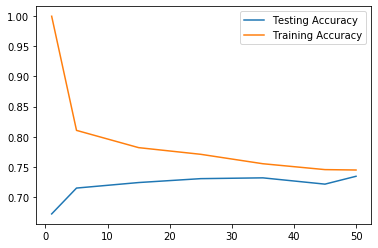

In [31]:
plt.plot(k_value, testing_accuracy, label="Testing Accuracy")
plt.plot(k_value, training_accuracy, label="Training Accuracy")
plt.legend()

In [82]:
#Accuracy average for each k value
accuracy_average

[0.6354166666666666,
 0.7395833333333334,
 0.7447916666666666,
 0.734375,
 0.7239583333333334,
 0.71875,
 0.7239583333333334]

#### 6) Can you spot where the model has high variance(overfitting) and where it has low variance?
 - Well, the model is underfitting with low value of k. Seems that the model is performing poorly, but with high value of k for the n_neighbor hyperparameters we see that the testing and training accuracy are very close which can show some overfitting possibly happening.

#### 7) KNN can be also used for regression. Repeat the previous steps using the scikit-learn implementation of KNN regressor. Load the Boston dataset in that is proved by scikit learn and use the mean squared error (mean_squared_error) as evaluation metric: you will need to specify the scoring argument in cross_validate = make_scorer(mean_squared_error). Vary K from 1 to 400

In [83]:
x,y = load_boston(return_X_y=True)
train_x2, test_x2, train_y2, test_y2 = train_test_split(x, y)
boston_k_values = [1,100,200,300,400]

In [84]:
accuracy_average2 = []
testing_accuracy2 = []
training_accuracy2 = []

In [85]:
model2 = KNeighborsRegressor(n_neighbors=1)
model2.fit(train_x2,train_y2)
accuracy_average2.append(model2.score(test_x2, test_y2))
score = cross_validate(model2,x,y,return_train_score=True,scoring=make_scorer(mean_squared_error))
testing_accuracy2.append(mean(score['test_score']))
training_accuracy2.append(mean(score['train_score']))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [86]:
model2 = KNeighborsRegressor(n_neighbors=100)
model2.fit(train_x2,train_y2)
accuracy_average2.append(model2.score(test_x2, test_y2))
score = cross_validate(model2, x, y, return_train_score=True,scoring=make_scorer(mean_squared_error))
testing_accuracy2.append(mean(score['test_score']))
training_accuracy2.append(mean(score['train_score']))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [87]:
model2 = KNeighborsRegressor(n_neighbors=200)
model2.fit(train_x2,train_y2)
accuracy_average2.append(model2.score(test_x2, test_y2))
score = cross_validate(model2, x, y, return_train_score=True)
testing_accuracy2.append(mean(score['test_score']))
training_accuracy2.append(mean(score['train_score']))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [88]:
model2 = KNeighborsRegressor(n_neighbors=300)
model2.fit(train_x2,train_y2)
accuracy_average2.append(model2.score(test_x2, test_y2))
score = cross_validate(model2, x, y, return_train_score=True,scoring=make_scorer(mean_squared_error))
testing_accuracy2.append(mean(score['test_score']))
training_accuracy2.append(mean(score['train_score']))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [89]:
model2 = KNeighborsRegressor(n_neighbors=330)
model2.fit(train_x2,train_y2)
accuracy_average2.append(model2.score(test_x2, test_y2))
score = cross_validate(model2, x, y, return_train_score=True,scoring=make_scorer(mean_squared_error))
testing_accuracy2.append(mean(score['test_score']))
training_accuracy2.append(mean(score['train_score']))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


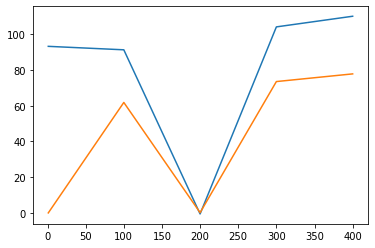

In [90]:
plt.plot(boston_k_values, testing_accuracy2)
plt.plot(boston_k_values, training_accuracy2)

In [91]:
#score for every k value
accuracy_average2

[0.18726647832286603,
 0.2152913471228649,
 0.1711152733079968,
 0.11768726352891024,
 0.06866847873094062]

### Problem 5


####  1) Suppose we have a set of observations that consist of one feature; those obervations cover uniformly the interval from 0 to 1 (the black line shown in (a)). Suppose that we wish to predict the response for a new observation (the black dot shown in (a)); this new observation is centered in a sub-interval of length l observations. To make the prediction for this new data point, we want to only use the observations that lie in this sub-interval (the blue line shown in (a)). On average, what fraction of the available observations we will use to make this prediction?
  - Well, to get the prediction to land between the blue line and be located within that line and where the new observation is located within the sub interval, the fraction on getting this result would be easier to get. We are specifically looking for a small range within 0 and 1 to get this prediction where the black dot is located. Only a couple of observations would be placed within the sub interval where this new observation dot is placed but it would be easier and quicker to find.
 

#### 2) Suppose we have a set of observations that consist of two features; those obervations cover uniformly the unit square (the black square shown in (b)). Suppose that we wish to predict the response for a new observation (the black dot shown in (b)); this new observation is centered in a smaller square with l as the side length. To make the prediction for this new data point, we want to only use the observations that lie in this small square (the blue square shown in (b)). On average, what fraction of the available observations we will use to make this prediction?
  - Well, to get the new observation to land within the small sqaure we can see that in a two feature space that it will take more computional power and just overall effort to find 2 features that will be placed within that sqaure. On average the fraction/chance of getting a prediction within the sqaure will be harder to get compared to the 1 feature observation.

#### 3) Repeat the same question for when the data has 3 features (as shown in (c)). Can you generalize your answer for any number of features p?
 - To start, within the cube that is presented within (c) the probability to get 3 features to create a new observation within that cube gets smaller. We can generalize that the more features we are using the more sparse the data becomes and looks within the space and it would be hard to know the statistical signifigance of the observations.

#### 4) Using the general form from subpart 3 and assuming that l = 0.1 (representing the fraction of needed observations), how does the fraction of the available observations used in prediction change with p? You can show a plot or explain your answer. Can you argue that a disadvantage of KNN is that when p is large, there are few observations that are close to the new data point? Optional - you can think about the fraction of observations as k/N, where k is the number of nearest neighbors and N is the number of observations. How many observations (N expressed in terms of p) do we need for k = 10 and l = 0.1?
 - Well when the number of features increase the fraction value gets lower and lower. Meaning, when including more features the number from 0 to 1 gets closer to 0. Yes, the disadvantage of KNN is that when p is large then this requires more data and can lead to overfitting because of the high dimensionality. The amount of observations would be 100 observations.

#### 5) Assume that you need inside the hypercube 10% of the available observations. (Note: a hypercube is a generalization of a cube; when p=1 it is a line, when p=2 it is a square, when p = 3 it is a cube). What is the length of each side of the hypercube? How does the length change as p increases? Again you can show a plot or explain your answer. Can you argue that when p is large, what KNN assumes as a near neighbor to a data point, might not be actually similar to this data point?
 - As p increases the length of each side increases with the hypercube to store more features within that space. The dimensionality increases when the p value increases which means we need to create a bigger cube to contain all of that data. We can argue that when p is large the knn assume the nearest neighbor to a data might not actually be that data point because we might have noise and data points that are not a part of a specific the specific class that we are looking for. 